#### 4.1  Hyper-parameter Tuning
4.1.1. Using learning rate = 0.001

Files already downloaded and verified
Files already downloaded and verified
done loading data
[Epoch 1] loss: 0.067
[Epoch 2] loss: 0.065
[Epoch 3] loss: 0.063
[Epoch 4] loss: 0.062
[Epoch 5] loss: 0.061
[Epoch 6] loss: 0.061
[Epoch 7] loss: 0.060
[Epoch 8] loss: 0.060
[Epoch 9] loss: 0.060
[Epoch 10] loss: 0.059
[Epoch 11] loss: 0.059
[Epoch 12] loss: 0.059
[Epoch 13] loss: 0.059
[Epoch 14] loss: 0.059
[Epoch 15] loss: 0.059
[Epoch 16] loss: 0.059
[Epoch 17] loss: 0.059
[Epoch 18] loss: 0.059
[Epoch 19] loss: 0.059
[Epoch 20] loss: 0.059
Accuracy on test set: 57.76%
Accuracy of airplane : 61 %
Accuracy of automobile : 73 %
Accuracy of  bird : 38 %
Accuracy of   cat : 27 %
Accuracy of  deer : 31 %
Accuracy of   dog : 58 %
Accuracy of  frog : 70 %
Accuracy of horse : 71 %
Accuracy of  ship : 69 %
Accuracy of truck : 76 %
done training and evaluating


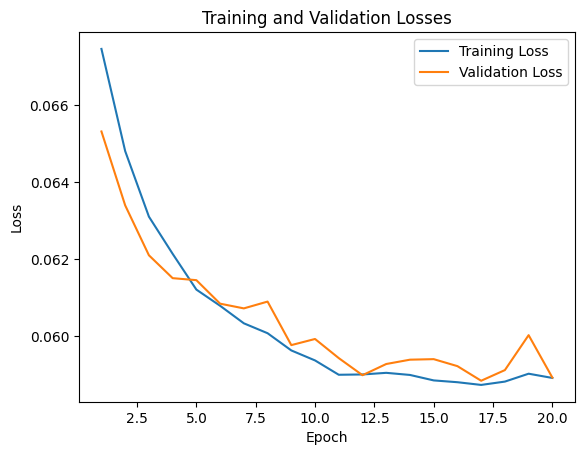

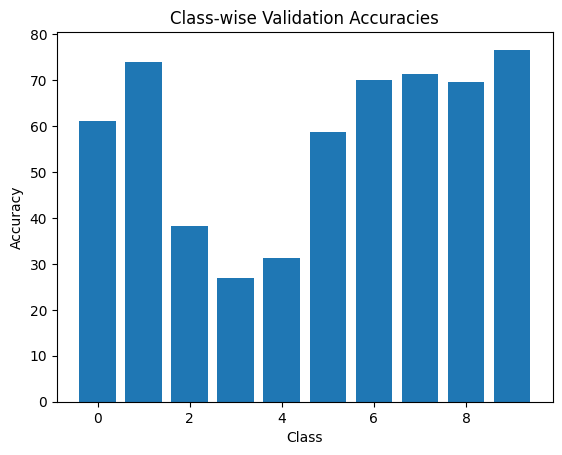

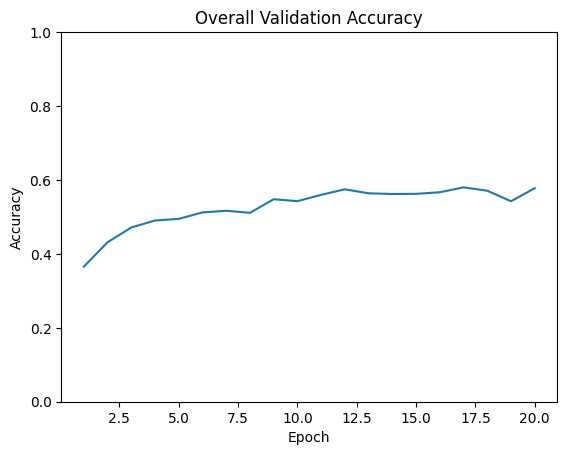

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the layers
class Conv2D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super(Conv2D, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding)
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        return x

class MaxPool2D(nn.Module):
    def __init__(self, kernel_size, stride=None, padding=0):
        super(MaxPool2D, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size, stride=stride, padding=padding)
        
    def forward(self, x):
        x = self.pool(x)
        return x

class Linear(nn.Module):
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        x = self.linear(x)
        return x

class ReLU(nn.Module):
    def __init__(self):
        super(ReLU, self).__init__()
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.relu(x)
        return x

# Define the neural network model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(3, 32, kernel_size=3, padding=1)
        self.pool1 = MaxPool2D(kernel_size=2)
        self.conv2 = Conv2D(32, 64, kernel_size=5, padding=2)
        self.pool2 = MaxPool2D(kernel_size=2)
        self.conv3 = Conv2D(64, 64, kernel_size=3, padding=1)
        self.fc1 = Linear(64 * 8 * 8, 64)
        self.fc2 = Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.fc1(x)
        x = ReLU()(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = MyModel()
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.training_losses = []
        self.validation_losses = []
        self.validation_accuracies = []
        self.classwise_accuracies = []
        
    def train(self, train_data_loader, val_data_loader, epochs=10):
        self.model.train()
        for epoch in range(epochs):
            epoch_loss = 0.0
            for images, labels in train_data_loader:
                
                self.optimizer.zero_grad()
                outputs = self.model.forward(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
            self.training_losses.append(epoch_loss / len(train_data_loader.dataset))
            print('[Epoch %d] loss: %.3f' % (epoch + 1, epoch_loss / len(train_data_loader.dataset)))
            
            
            val_loss = 0.0
            total_correct = 0
            total_samples = 0
            with torch.no_grad():
                for images, labels in val_data_loader:
                    outputs = self.model.forward(images) 
                    loss = self.criterion(outputs, labels)
                    val_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    total_correct += (predicted == labels).sum().item()
                    total_samples += labels.size(0)
                    
            accuracy = total_correct / total_samples
            self.validation_accuracies.append(accuracy)
            
            self.validation_losses.append(val_loss / len(val_data_loader.dataset))
            
        
            
            #for i, data in enumerate(zip(x_train, y_train)):
            #inputs, labels = data
            """self.optimizer.zero_grad()
            outputs = self.model.forward(x_train)
            loss = self.criterion(outputs, y_train)
            loss.backward()
            self.optimizer.step() 
            running_loss += loss.item()
            print('[Epoch %d] loss: %.3f' % (epoch + 1, running_loss / len(x_train)))"""
        
    """def evaluate(self, x_test, y_test):
        self.model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for i, data in enumerate(zip(x_test, y_test)):
                inputs, labels = data
                outputs = self.model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print('Accuracy: %d %%' % (100 * correct / total))"""
        
    def evaluate(self, test_data_loader):
        self.model.eval()
        total_correct = 0
        total_samples = 0
        class_correct = [0 for _ in range(10)]
        class_total = [0 for _ in range(10)]
        
        with torch.no_grad():
            for images, labels in test_data_loader:
                outputs = self.model(images)
                _, predicted = torch.max(outputs, 1)
                total_correct += (predicted == labels).sum().item()
                total_samples += labels.size(0)
                for i in range(labels.size(0)):
                    label = labels[i]
                    pred = predicted[i]
                    if label == pred:
                        class_correct[label] += 1
                    class_total[label] += 1
                
        accuracy = total_correct / total_samples
        print('Accuracy on test set: %.2f%%' % (100 * accuracy))
        
        for i in range(10):
            class_accuracy = 100 * class_correct[i] / class_total[i]
            self.classwise_accuracies.append(class_accuracy)
            print('Accuracy of %5s : %2d %%' % (testset.classes[i], class_accuracy))


# Load and preprocess the dataset

if __name__ == '__main__':
    # For cifar-10 you get pre-built loaders
    transform = transforms.Compose(
    [transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                              shuffle=True, num_workers=4)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                             shuffle=False, num_workers=4)
    
    # Get x_train and y_train
    x_train = []
    y_train = []
    for batch in trainloader:
        images, labels = batch
        x_train.append(images)
        y_train.append(labels)
    x_train = torch.cat(x_train, dim=0)
    y_train = torch.cat(y_train, dim=0)
    
    # Get x_test and y_test
    x_test = []
    y_test = []
    for batch in testloader:
        images, labels = batch
        x_test.append(images)
        y_test.append(labels)
    x_test = torch.cat(x_test, dim=0)
    y_test = torch.cat(y_test, dim=0)
    
    print("done loading data")

    x = Net()
    
    epochs = [i for i in range(1, 21)]

    x.train(trainloader, testloader, len(epochs))
    x.evaluate(testloader)
    
    print("done training and evaluating")
    # Plotting the training and validation losses  
    
    plt.plot(epochs, x.training_losses, label='Training Loss')
    plt.plot(epochs, x.validation_losses, label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plotting the class-wise validation accuracies
    classes = np.arange(len(x.classwise_accuracies))
    plt.bar(classes, x.classwise_accuracies)
    plt.title('Class-wise Validation Accuracies')
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.show()
    
    # Plotting the overall validation accuracy
    
    overall_accuracy = x.validation_accuracies
    
    plt.plot(epochs, overall_accuracy)
    plt.title('Overall Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.show()
    
    
    
    
 
    
    
    
    


Changing the learning rate to 0.0001

Files already downloaded and verified
Files already downloaded and verified
done loading data
[Epoch 1] loss: 0.068
[Epoch 2] loss: 0.066
[Epoch 3] loss: 0.065
[Epoch 4] loss: 0.064
[Epoch 5] loss: 0.063
[Epoch 6] loss: 0.063
[Epoch 7] loss: 0.062
[Epoch 8] loss: 0.062
[Epoch 9] loss: 0.062
[Epoch 10] loss: 0.061
[Epoch 11] loss: 0.061
[Epoch 12] loss: 0.061
[Epoch 13] loss: 0.060
[Epoch 14] loss: 0.060
[Epoch 15] loss: 0.060
[Epoch 16] loss: 0.060
[Epoch 17] loss: 0.060
[Epoch 18] loss: 0.059
[Epoch 19] loss: 0.059
[Epoch 20] loss: 0.059
Accuracy on test set: 58.04%
Accuracy of airplane : 56 %
Accuracy of automobile : 67 %
Accuracy of  bird : 47 %
Accuracy of   cat : 41 %
Accuracy of  deer : 45 %
Accuracy of   dog : 41 %
Accuracy of  frog : 74 %
Accuracy of horse : 60 %
Accuracy of  ship : 80 %
Accuracy of truck : 65 %
done training and evaluating


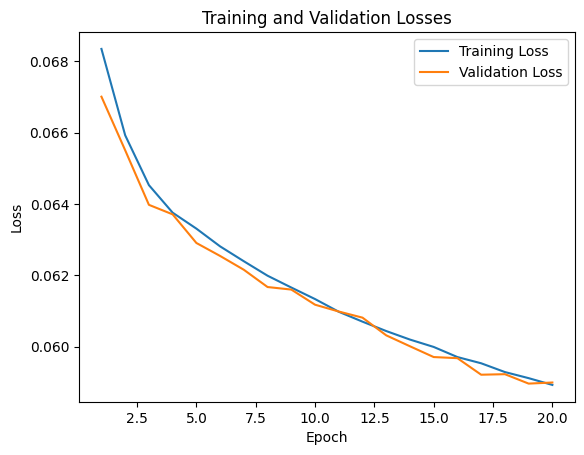

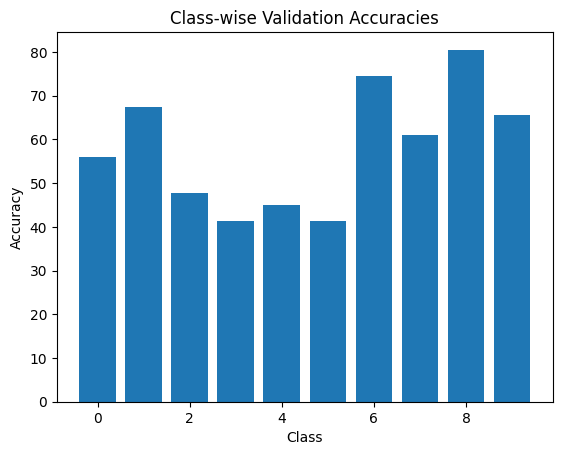

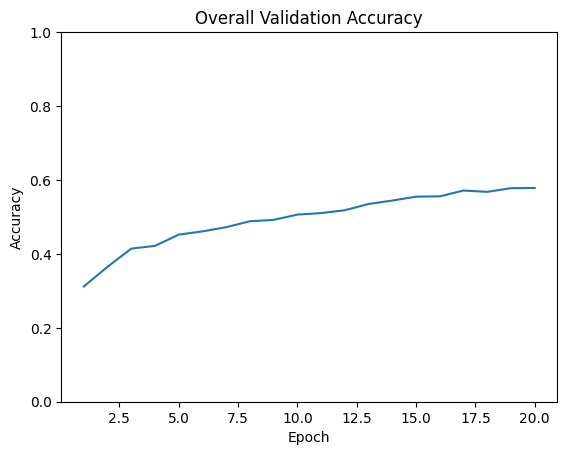

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the layers
class Conv2D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super(Conv2D, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding)
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        return x

class MaxPool2D(nn.Module):
    def __init__(self, kernel_size, stride=None, padding=0):
        super(MaxPool2D, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size, stride=stride, padding=padding)
        
    def forward(self, x):
        x = self.pool(x)
        return x

class Linear(nn.Module):
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        x = self.linear(x)
        return x

class ReLU(nn.Module):
    def __init__(self):
        super(ReLU, self).__init__()
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.relu(x)
        return x

# Define the neural network model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(3, 32, kernel_size=3, padding=1)
        self.pool1 = MaxPool2D(kernel_size=2)
        self.conv2 = Conv2D(32, 64, kernel_size=5, padding=2)
        self.pool2 = MaxPool2D(kernel_size=2)
        self.conv3 = Conv2D(64, 64, kernel_size=3, padding=1)
        self.fc1 = Linear(64 * 8 * 8, 64)
        self.fc2 = Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.fc1(x)
        x = ReLU()(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = MyModel()
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.0001)
        self.training_losses = []
        self.validation_losses = []
        self.validation_accuracies = []
        self.classwise_accuracies = []
        
    def train(self, train_data_loader, val_data_loader, epochs=10):
        self.model.train()
        for epoch in range(epochs):
            epoch_loss = 0.0
            for images, labels in train_data_loader:
                
                self.optimizer.zero_grad()
                outputs = self.model.forward(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
            self.training_losses.append(epoch_loss / len(train_data_loader.dataset))
            print('[Epoch %d] loss: %.3f' % (epoch + 1, epoch_loss / len(train_data_loader.dataset)))
            
            
            val_loss = 0.0
            total_correct = 0
            total_samples = 0
            with torch.no_grad():
                for images, labels in val_data_loader:
                    outputs = self.model.forward(images) 
                    loss = self.criterion(outputs, labels)
                    val_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    total_correct += (predicted == labels).sum().item()
                    total_samples += labels.size(0)
                    
            accuracy = total_correct / total_samples
            self.validation_accuracies.append(accuracy)
            
            self.validation_losses.append(val_loss / len(val_data_loader.dataset))
            
        
            
            #for i, data in enumerate(zip(x_train, y_train)):
            #inputs, labels = data
            """self.optimizer.zero_grad()
            outputs = self.model.forward(x_train)
            loss = self.criterion(outputs, y_train)
            loss.backward()
            self.optimizer.step() 
            running_loss += loss.item()
            print('[Epoch %d] loss: %.3f' % (epoch + 1, running_loss / len(x_train)))"""
        
    """def evaluate(self, x_test, y_test):
        self.model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for i, data in enumerate(zip(x_test, y_test)):
                inputs, labels = data
                outputs = self.model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print('Accuracy: %d %%' % (100 * correct / total))"""
        
    def evaluate(self, test_data_loader):
        self.model.eval()
        total_correct = 0
        total_samples = 0
        class_correct = [0 for _ in range(10)]
        class_total = [0 for _ in range(10)]
        
        with torch.no_grad():
            for images, labels in test_data_loader:
                outputs = self.model(images)
                _, predicted = torch.max(outputs, 1)
                total_correct += (predicted == labels).sum().item()
                total_samples += labels.size(0)
                for i in range(labels.size(0)):
                    label = labels[i]
                    pred = predicted[i]
                    if label == pred:
                        class_correct[label] += 1
                    class_total[label] += 1
                
        accuracy = total_correct / total_samples
        print('Accuracy on test set: %.2f%%' % (100 * accuracy))
        
        for i in range(10):
            class_accuracy = 100 * class_correct[i] / class_total[i]
            self.classwise_accuracies.append(class_accuracy)
            print('Accuracy of %5s : %2d %%' % (testset.classes[i], class_accuracy))


# Load and preprocess the dataset

if __name__ == '__main__':
    # For cifar-10 you get pre-built loaders
    transform = transforms.Compose(
        [transforms.RandomCrop(32, padding=4),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                              shuffle=True, num_workers=4)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                             shuffle=False, num_workers=4)
    
    # Get x_train and y_train
    x_train = []
    y_train = []
    for batch in trainloader:
        images, labels = batch
        x_train.append(images)
        y_train.append(labels)
    x_train = torch.cat(x_train, dim=0)
    y_train = torch.cat(y_train, dim=0)
    
    # Get x_test and y_test
    x_test = []
    y_test = []
    for batch in testloader:
        images, labels = batch
        x_test.append(images)
        y_test.append(labels)
    x_test = torch.cat(x_test, dim=0)
    y_test = torch.cat(y_test, dim=0)
    
    print("done loading data")

    x = Net()
    
    epochs = [i for i in range(1, 21)]

    x.train(trainloader, testloader, len(epochs))
    x.evaluate(testloader)
    
    print("done training and evaluating")
    # Plotting the training and validation losses  
    
    plt.plot(epochs, x.training_losses, label='Training Loss')
    plt.plot(epochs, x.validation_losses, label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plotting the class-wise validation accuracies
    classes = np.arange(len(x.classwise_accuracies))
    plt.bar(classes, x.classwise_accuracies)
    plt.title('Class-wise Validation Accuracies')
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.show()
    
    # Plotting the overall validation accuracy
    
    overall_accuracy = x.validation_accuracies
    
    plt.plot(epochs, overall_accuracy)
    plt.title('Overall Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.show()
    
    
    
    
 
    
    
    
    


Changing learning rate to 0.01

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the layers
class Conv2D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super(Conv2D, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding)
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        return x

class MaxPool2D(nn.Module):
    def __init__(self, kernel_size, stride=None, padding=0):
        super(MaxPool2D, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size, stride=stride, padding=padding)
        
    def forward(self, x):
        x = self.pool(x)
        return x

class Linear(nn.Module):
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        x = self.linear(x)
        return x

class ReLU(nn.Module):
    def __init__(self):
        super(ReLU, self).__init__()
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.relu(x)
        return x

# Define the neural network model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(3, 32, kernel_size=3, padding=1)
        self.pool1 = MaxPool2D(kernel_size=2)
        self.conv2 = Conv2D(32, 64, kernel_size=5, padding=2)
        self.pool2 = MaxPool2D(kernel_size=2)
        self.conv3 = Conv2D(64, 64, kernel_size=3, padding=1)
        self.fc1 = Linear(64 * 8 * 8, 64)
        self.fc2 = Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.fc1(x)
        x = ReLU()(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = MyModel()
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.01)
        self.training_losses = []
        self.validation_losses = []
        self.validation_accuracies = []
        self.classwise_accuracies = []
        
    def train(self, train_data_loader, val_data_loader, epochs=10):
        self.model.train()
        for epoch in range(epochs):
            epoch_loss = 0.0
            for images, labels in train_data_loader:
                
                self.optimizer.zero_grad()
                outputs = self.model.forward(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
            self.training_losses.append(epoch_loss / len(train_data_loader.dataset))
            print('[Epoch %d] loss: %.3f' % (epoch + 1, epoch_loss / len(train_data_loader.dataset)))
            
            
            val_loss = 0.0
            total_correct = 0
            total_samples = 0
            with torch.no_grad():
                for images, labels in val_data_loader:
                    outputs = self.model.forward(images) 
                    loss = self.criterion(outputs, labels)
                    val_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    total_correct += (predicted == labels).sum().item()
                    total_samples += labels.size(0)
                    
            accuracy = total_correct / total_samples
            self.validation_accuracies.append(accuracy)
            
            self.validation_losses.append(val_loss / len(val_data_loader.dataset))
            
        
            
            #for i, data in enumerate(zip(x_train, y_train)):
            #inputs, labels = data
            """self.optimizer.zero_grad()
            outputs = self.model.forward(x_train)
            loss = self.criterion(outputs, y_train)
            loss.backward()
            self.optimizer.step() 
            running_loss += loss.item()
            print('[Epoch %d] loss: %.3f' % (epoch + 1, running_loss / len(x_train)))"""
        
    """def evaluate(self, x_test, y_test):
        self.model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for i, data in enumerate(zip(x_test, y_test)):
                inputs, labels = data
                outputs = self.model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print('Accuracy: %d %%' % (100 * correct / total))"""
        
    def evaluate(self, test_data_loader):
        self.model.eval()
        total_correct = 0
        total_samples = 0
        class_correct = [0 for _ in range(10)]
        class_total = [0 for _ in range(10)]
        
        with torch.no_grad():
            for images, labels in test_data_loader:
                outputs = self.model(images)
                _, predicted = torch.max(outputs, 1)
                total_correct += (predicted == labels).sum().item()
                total_samples += labels.size(0)
                for i in range(labels.size(0)):
                    label = labels[i]
                    pred = predicted[i]
                    if label == pred:
                        class_correct[label] += 1
                    class_total[label] += 1
                
        accuracy = total_correct / total_samples
        print('Accuracy on test set: %.2f%%' % (100 * accuracy))
        
        for i in range(10):
            class_accuracy = 100 * class_correct[i] / class_total[i]
            self.classwise_accuracies.append(class_accuracy)
            print('Accuracy of %5s : %2d %%' % (testset.classes[i], class_accuracy))


# Load and preprocess the dataset

if __name__ == '__main__':
    # For cifar-10 you get pre-built loaders
    transform = transforms.Compose(
    [transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                              shuffle=True, num_workers=4)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                             shuffle=False, num_workers=4)
    
    # Get x_train and y_train
    x_train = []
    y_train = []
    for batch in trainloader:
        images, labels = batch
        x_train.append(images)
        y_train.append(labels)
    x_train = torch.cat(x_train, dim=0)
    y_train = torch.cat(y_train, dim=0)
    
    # Get x_test and y_test
    x_test = []
    y_test = []
    for batch in testloader:
        images, labels = batch
        x_test.append(images)
        y_test.append(labels)
    x_test = torch.cat(x_test, dim=0)
    y_test = torch.cat(y_test, dim=0)
    
    print("done loading data")

    x = Net()
    
    epochs = [i for i in range(1, 21)]

    x.train(trainloader, testloader, len(epochs))
    x.evaluate(testloader)
    
    print("done training and evaluating")
    # Plotting the training and validation losses  
    
    plt.plot(epochs, x.training_losses, label='Training Loss')
    plt.plot(epochs, x.validation_losses, label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plotting the class-wise validation accuracies
    classes = np.arange(len(x.classwise_accuracies))
    plt.bar(classes, x.classwise_accuracies)
    plt.title('Class-wise Validation Accuracies')
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.show()
    
    # Plotting the overall validation accuracy
    
    overall_accuracy = x.validation_accuracies
    
    plt.plot(epochs, overall_accuracy)
    plt.title('Overall Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.show()
    
    
    
    
 
    
    
    
    


Files already downloaded and verified
Files already downloaded and verified
done loading data
[Epoch 1] loss: 0.074
[Epoch 2] loss: 0.074
[Epoch 3] loss: 0.074
[Epoch 4] loss: 0.074
[Epoch 5] loss: 0.074
[Epoch 6] loss: 0.074
[Epoch 7] loss: 0.074


KeyboardInterrupt: ignored

4.1.4. Varying Batch Size

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the layers
class Conv2D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super(Conv2D, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding)
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        return x

class MaxPool2D(nn.Module):
    def __init__(self, kernel_size, stride=None, padding=0):
        super(MaxPool2D, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size, stride=stride, padding=padding)
        
    def forward(self, x):
        x = self.pool(x)
        return x

class Linear(nn.Module):
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        x = self.linear(x)
        return x

class ReLU(nn.Module):
    def __init__(self):
        super(ReLU, self).__init__()
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.relu(x)
        return x

# Define the neural network model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(3, 32, kernel_size=3, padding=1)
        self.pool1 = MaxPool2D(kernel_size=2)
        self.conv2 = Conv2D(32, 64, kernel_size=5, padding=2)
        self.pool2 = MaxPool2D(kernel_size=2)
        self.conv3 = Conv2D(64, 64, kernel_size=3, padding=1)
        self.fc1 = Linear(64 * 8 * 8, 64)
        self.fc2 = Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.fc1(x)
        x = ReLU()(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = MyModel()
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.training_losses = []
        self.validation_losses = []
        self.validation_accuracies = []
        self.classwise_accuracies = []
        
    def train(self, train_data_loader, val_data_loader, epochs=10):
        self.model.train()
        for epoch in range(epochs):
            epoch_loss = 0.0
            for images, labels in train_data_loader:
                
                self.optimizer.zero_grad()
                outputs = self.model.forward(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
            self.training_losses.append(epoch_loss / len(train_data_loader.dataset))
            print('[Epoch %d] loss: %.3f' % (epoch + 1, epoch_loss / len(train_data_loader.dataset)))
            
            
            val_loss = 0.0
            total_correct = 0
            total_samples = 0
            with torch.no_grad():
                for images, labels in val_data_loader:
                    outputs = self.model.forward(images) 
                    loss = self.criterion(outputs, labels)
                    val_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    total_correct += (predicted == labels).sum().item()
                    total_samples += labels.size(0)
                    
            accuracy = total_correct / total_samples
            self.validation_accuracies.append(accuracy)
            
            self.validation_losses.append(val_loss / len(val_data_loader.dataset))
            
        
            
            #for i, data in enumerate(zip(x_train, y_train)):
            #inputs, labels = data
            """self.optimizer.zero_grad()
            outputs = self.model.forward(x_train)
            loss = self.criterion(outputs, y_train)
            loss.backward()
            self.optimizer.step() 
            running_loss += loss.item()
            print('[Epoch %d] loss: %.3f' % (epoch + 1, running_loss / len(x_train)))"""
        
    """def evaluate(self, x_test, y_test):
        self.model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for i, data in enumerate(zip(x_test, y_test)):
                inputs, labels = data
                outputs = self.model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print('Accuracy: %d %%' % (100 * correct / total))"""
        
    def evaluate(self, test_data_loader):
        self.model.eval()
        total_correct = 0
        total_samples = 0
        class_correct = [0 for _ in range(10)]
        class_total = [0 for _ in range(10)]
        
        with torch.no_grad():
            for images, labels in test_data_loader:
                outputs = self.model(images)
                _, predicted = torch.max(outputs, 1)
                total_correct += (predicted == labels).sum().item()
                total_samples += labels.size(0)
                for i in range(labels.size(0)):
                    label = labels[i]
                    pred = predicted[i]
                    if label == pred:
                        class_correct[label] += 1
                    class_total[label] += 1
                
        accuracy = total_correct / total_samples
        print('Accuracy on test set: %.2f%%' % (100 * accuracy))
        
        for i in range(10):
            class_accuracy = 100 * class_correct[i] / class_total[i]
            self.classwise_accuracies.append(class_accuracy)
            print('Accuracy of %5s : %2d %%' % (testset.classes[i], class_accuracy))


# Load and preprocess the dataset

if __name__ == '__main__':
    # For cifar-10 you get pre-built loaders
    transform = transforms.Compose(
    [transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                              shuffle=True, num_workers=4)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                             shuffle=False, num_workers=4)
    
    # Get x_train and y_train
    # x_train = []
    # y_train = []
    # for batch in trainloader:
    #     images, labels = batch
    #     x_train.append(images)
    #     y_train.append(labels)
    # x_train = torch.cat(x_train, dim=0)
    # y_train = torch.cat(y_train, dim=0)
    
    # # Get x_test and y_test
    # x_test = []
    # y_test = []
    # for batch in testloader:
    #     images, labels = batch
    #     x_test.append(images)
    #     y_test.append(labels)
    # x_test = torch.cat(x_test, dim=0)
    # y_test = torch.cat(y_test, dim=0)
    
    print("done loading data")

    x = Net()
    
    epochs = [i for i in range(1, 11)]

    x.train(trainloader, testloader, len(epochs))
    x.evaluate(testloader)
    
    print("done training and evaluating")
    # Plotting the training and validation losses  
    
    # plt.plot(epochs, x.training_losses, label='Training Loss')
    # plt.plot(epochs, x.validation_losses, label='Validation Loss')
    # plt.title('Training and Validation Losses')
    # plt.xlabel('Epoch')
    # plt.ylabel('Loss')
    # plt.legend()
    # plt.show()
    
    # # Plotting the class-wise validation accuracies
    # classes = np.arange(len(x.classwise_accuracies))
    # plt.bar(classes, x.classwise_accuracies)
    # plt.title('Class-wise Validation Accuracies')
    # plt.xlabel('Class')
    # plt.ylabel('Accuracy')
    # plt.show()
    
    # # Plotting the overall validation accuracy
    
    # overall_accuracy = x.validation_accuracies
    
    # plt.plot(epochs, overall_accuracy)
    # plt.title('Overall Validation Accuracy')
    # plt.xlabel('Epoch')
    # plt.ylabel('Accuracy')
    # plt.ylim([0, 1])
    # plt.show()

    overall_accyarcy = x.validation_accuracies[-1]
    print(overall_accuracy)
    
    
    
    
 
    
    
    
    


Files already downloaded and verified
Files already downloaded and verified
done loading data


KeyboardInterrupt: ignored

Increasing the number of batches to 8

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the layers
class Conv2D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super(Conv2D, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding)
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        return x

class MaxPool2D(nn.Module):
    def __init__(self, kernel_size, stride=None, padding=0):
        super(MaxPool2D, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size, stride=stride, padding=padding)
        
    def forward(self, x):
        x = self.pool(x)
        return x

class Linear(nn.Module):
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        x = self.linear(x)
        return x

class ReLU(nn.Module):
    def __init__(self):
        super(ReLU, self).__init__()
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.relu(x)
        return x

# Define the neural network model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(3, 32, kernel_size=3, padding=1)
        self.pool1 = MaxPool2D(kernel_size=2)
        self.conv2 = Conv2D(32, 64, kernel_size=5, padding=2)
        self.pool2 = MaxPool2D(kernel_size=2)
        self.conv3 = Conv2D(64, 64, kernel_size=3, padding=1)
        self.fc1 = Linear(64 * 8 * 8, 64)
        self.fc2 = Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.fc1(x)
        x = ReLU()(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = MyModel()
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.training_losses = []
        self.validation_losses = []
        self.validation_accuracies = []
        self.classwise_accuracies = []
        
    def train(self, train_data_loader, val_data_loader, epochs=10):
        self.model.train()
        for epoch in range(epochs):
            epoch_loss = 0.0
            for images, labels in train_data_loader:
                
                self.optimizer.zero_grad()
                outputs = self.model.forward(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
            self.training_losses.append(epoch_loss / len(train_data_loader.dataset))
            print('[Epoch %d] loss: %.3f' % (epoch + 1, epoch_loss / len(train_data_loader.dataset)))
            
            
            val_loss = 0.0
            total_correct = 0
            total_samples = 0
            with torch.no_grad():
                for images, labels in val_data_loader:
                    outputs = self.model.forward(images) 
                    loss = self.criterion(outputs, labels)
                    val_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    total_correct += (predicted == labels).sum().item()
                    total_samples += labels.size(0)
                    
            accuracy = total_correct / total_samples
            self.validation_accuracies.append(accuracy)
            
            self.validation_losses.append(val_loss / len(val_data_loader.dataset))
            
        
            
            #for i, data in enumerate(zip(x_train, y_train)):
            #inputs, labels = data
            """self.optimizer.zero_grad()
            outputs = self.model.forward(x_train)
            loss = self.criterion(outputs, y_train)
            loss.backward()
            self.optimizer.step() 
            running_loss += loss.item()
            print('[Epoch %d] loss: %.3f' % (epoch + 1, running_loss / len(x_train)))"""
        
    """def evaluate(self, x_test, y_test):
        self.model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for i, data in enumerate(zip(x_test, y_test)):
                inputs, labels = data
                outputs = self.model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print('Accuracy: %d %%' % (100 * correct / total))"""
        
    def evaluate(self, test_data_loader):
        self.model.eval()
        total_correct = 0
        total_samples = 0
        class_correct = [0 for _ in range(10)]
        class_total = [0 for _ in range(10)]
        
        with torch.no_grad():
            for images, labels in test_data_loader:
                outputs = self.model(images)
                _, predicted = torch.max(outputs, 1)
                total_correct += (predicted == labels).sum().item()
                total_samples += labels.size(0)
                for i in range(labels.size(0)):
                    label = labels[i]
                    pred = predicted[i]
                    if label == pred:
                        class_correct[label] += 1
                    class_total[label] += 1
                
        accuracy = total_correct / total_samples
        print('Accuracy on test set: %.2f%%' % (100 * accuracy))
        
        for i in range(10):
            class_accuracy = 100 * class_correct[i] / class_total[i]
            self.classwise_accuracies.append(class_accuracy)
            print('Accuracy of %5s : %2d %%' % (testset.classes[i], class_accuracy))


# Load and preprocess the dataset

if __name__ == '__main__':
    # For cifar-10 you get pre-built loaders
    transform = transforms.Compose(
    [transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=8,
                                              shuffle=True, num_workers=4)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=8,
                                             shuffle=False, num_workers=4)
    
    # Get x_train and y_train
    x_train = []
    y_train = []
    for batch in trainloader:
        images, labels = batch
        x_train.append(images)
        y_train.append(labels)
    x_train = torch.cat(x_train, dim=0)
    y_train = torch.cat(y_train, dim=0)
    
    # Get x_test and y_test
    x_test = []
    y_test = []
    for batch in testloader:
        images, labels = batch
        x_test.append(images)
        y_test.append(labels)
    x_test = torch.cat(x_test, dim=0)
    y_test = torch.cat(y_test, dim=0)
    
    print("done loading data")

    x = Net()
    
    epochs = [i for i in range(1, 11)]

    x.train(trainloader, testloader, len(epochs))
    x.evaluate(testloader)
    
    print("done training and evaluating")
    # Plotting the training and validation losses  
    
    plt.plot(epochs, x.training_losses, label='Training Loss')
    plt.plot(epochs, x.validation_losses, label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plotting the class-wise validation accuracies
    classes = np.arange(len(x.classwise_accuracies))
    plt.bar(classes, x.classwise_accuracies)
    plt.title('Class-wise Validation Accuracies')
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.show()
    
    # Plotting the overall validation accuracy
    
    overall_accuracy = x.validation_accuracies
    
    plt.plot(epochs, overall_accuracy)
    plt.title('Overall Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.show()
    
    
    
    
 
    
    
    
    


Increasing batch size to 16

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the layers
class Conv2D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super(Conv2D, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride=stride, padding=padding)
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.relu(x)
        return x

class MaxPool2D(nn.Module):
    def __init__(self, kernel_size, stride=None, padding=0):
        super(MaxPool2D, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size, stride=stride, padding=padding)
        
    def forward(self, x):
        x = self.pool(x)
        return x

class Linear(nn.Module):
    def __init__(self, in_features, out_features):
        super(Linear, self).__init__()
        self.linear = nn.Linear(in_features, out_features)
        
    def forward(self, x):
        x = self.linear(x)
        return x

class ReLU(nn.Module):
    def __init__(self):
        super(ReLU, self).__init__()
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self, x):
        x = self.relu(x)
        return x

# Define the neural network model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(3, 32, kernel_size=3, padding=1)
        self.pool1 = MaxPool2D(kernel_size=2)
        self.conv2 = Conv2D(32, 64, kernel_size=5, padding=2)
        self.pool2 = MaxPool2D(kernel_size=2)
        self.conv3 = Conv2D(64, 64, kernel_size=3, padding=1)
        self.fc1 = Linear(64 * 8 * 8, 64)
        self.fc2 = Linear(64, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.conv3(x)
        x = x.view(-1, 64 * 8 * 8)
        x = self.fc1(x)
        x = ReLU()(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = MyModel()
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=0.001)
        self.training_losses = []
        self.validation_losses = []
        self.validation_accuracies = []
        self.classwise_accuracies = []
        
    def train(self, train_data_loader, val_data_loader, epochs=10):
        self.model.train()
        for epoch in range(epochs):
            epoch_loss = 0.0
            for images, labels in train_data_loader:
                
                self.optimizer.zero_grad()
                outputs = self.model.forward(images)
                loss = self.criterion(outputs, labels)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
            self.training_losses.append(epoch_loss / len(train_data_loader.dataset))
            print('[Epoch %d] loss: %.3f' % (epoch + 1, epoch_loss / len(train_data_loader.dataset)))
            
            
            val_loss = 0.0
            total_correct = 0
            total_samples = 0
            with torch.no_grad():
                for images, labels in val_data_loader:
                    outputs = self.model.forward(images) 
                    loss = self.criterion(outputs, labels)
                    val_loss += loss.item()
                    _, predicted = torch.max(outputs, 1)
                    total_correct += (predicted == labels).sum().item()
                    total_samples += labels.size(0)
                    
            accuracy = total_correct / total_samples
            self.validation_accuracies.append(accuracy)
            
            self.validation_losses.append(val_loss / len(val_data_loader.dataset))
            
        
            
            #for i, data in enumerate(zip(x_train, y_train)):
            #inputs, labels = data
            """self.optimizer.zero_grad()
            outputs = self.model.forward(x_train)
            loss = self.criterion(outputs, y_train)
            loss.backward()
            self.optimizer.step() 
            running_loss += loss.item()
            print('[Epoch %d] loss: %.3f' % (epoch + 1, running_loss / len(x_train)))"""
        
    """def evaluate(self, x_test, y_test):
        self.model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for i, data in enumerate(zip(x_test, y_test)):
                inputs, labels = data
                outputs = self.model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print('Accuracy: %d %%' % (100 * correct / total))"""
        
    def evaluate(self, test_data_loader):
        self.model.eval()
        total_correct = 0
        total_samples = 0
        class_correct = [0 for _ in range(10)]
        class_total = [0 for _ in range(10)]
        
        with torch.no_grad():
            for images, labels in test_data_loader:
                outputs = self.model(images)
                _, predicted = torch.max(outputs, 1)
                total_correct += (predicted == labels).sum().item()
                total_samples += labels.size(0)
                for i in range(labels.size(0)):
                    label = labels[i]
                    pred = predicted[i]
                    if label == pred:
                        class_correct[label] += 1
                    class_total[label] += 1
                
        accuracy = total_correct / total_samples
        print('Accuracy on test set: %.2f%%' % (100 * accuracy))
        
        for i in range(10):
            class_accuracy = 100 * class_correct[i] / class_total[i]
            self.classwise_accuracies.append(class_accuracy)
            print('Accuracy of %5s : %2d %%' % (testset.classes[i], class_accuracy))


# Load and preprocess the dataset

if __name__ == '__main__':
    # For cifar-10 you get pre-built loaders
    transform = transforms.Compose(
    [transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                            download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                              shuffle=True, num_workers=4)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                           download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=16,
                                             shuffle=False, num_workers=4)
    
    # Get x_train and y_train
    x_train = []
    y_train = []
    for batch in trainloader:
        images, labels = batch
        x_train.append(images)
        y_train.append(labels)
    x_train = torch.cat(x_train, dim=0)
    y_train = torch.cat(y_train, dim=0)
    
    # Get x_test and y_test
    x_test = []
    y_test = []
    for batch in testloader:
        images, labels = batch
        x_test.append(images)
        y_test.append(labels)
    x_test = torch.cat(x_test, dim=0)
    y_test = torch.cat(y_test, dim=0)
    
    print("done loading data")

    x = Net()
    
    epochs = [i for i in range(1, 11)]

    x.train(trainloader, testloader, len(epochs))
    x.evaluate(testloader)
    
    print("done training and evaluating")
    # Plotting the training and validation losses  
    
    plt.plot(epochs, x.training_losses, label='Training Loss')
    plt.plot(epochs, x.validation_losses, label='Validation Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plotting the class-wise validation accuracies
    classes = np.arange(len(x.classwise_accuracies))
    plt.bar(classes, x.classwise_accuracies)
    plt.title('Class-wise Validation Accuracies')
    plt.xlabel('Class')
    plt.ylabel('Accuracy')
    plt.show()
    
    # Plotting the overall validation accuracy
    
    overall_accuracy = x.validation_accuracies
    
    plt.plot(epochs, overall_accuracy)
    plt.title('Overall Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.show()
    
    
    
    
 
    
    
    
    
